In [1]:
import numpy as np
import strax as sx
import numba
import pandas as pd
import scipy as sp
import sys
import os
import helix as hx
import shutil
from glob import glob
from matplotlib import pyplot as plt


In [2]:
run_id = 'run10' 
duration = 10  # seconds
raw_data_dir = 'toy_data'  # to save the raw toy data
helix_data_dir = 'test_helix_data'  # to save the run metadata
baseline_step = 0  # add a baseline equal to baseline_step*channel_index to each channel

In [3]:
# remove helix data corresponding to this run_id, if it exists
for path in glob(f'{helix_data_dir}/*'):
    if os.path.isdir(path):
        shutil.rmtree(path)
    else:
        os.remove(path)
    
hx.generate_toy_data(run_id, duration, raw_data_dir, helix_data_dir=helix_data_dir, overwrite=True, baseline_step=baseline_step)

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]


In [4]:
context = sx.Context(storage=[sx.DataDirectory(helix_data_dir, provide_run_metadata=True), ],
                     register=[hx.MMCRecords,
                               hx.QPTriggers, hx.UVTriggers,
                               hx.Events, hx.NoiseEvents,
                               hx.NoisePSDs, hx.FitResults])    # all the plugins required for getting fit_results

# creating a dictionary of plugins' options that we want to modify. 
config = {'run_metadata_directory': helix_data_dir,      # for the hx.ToyDataRawRecords plugin
          'noise_events_random_seed': 1}                 # for the hx.NoiseEvents plugin

context.set_config(config)

In [5]:
events = context.get_array(run_id, 'events')

raw_data = events['channel_data']


Loading events: |                     | 0.00 % [00:14<?], #2 (7.10 s). 24.2 MB/s

Source finished!


In [6]:
raw_data.shape

(23, 50, 33168)

Loading events: |█████████████| 100.00 % [00:00<00:00], #2 (0.03 s). 5256.5 MB/s


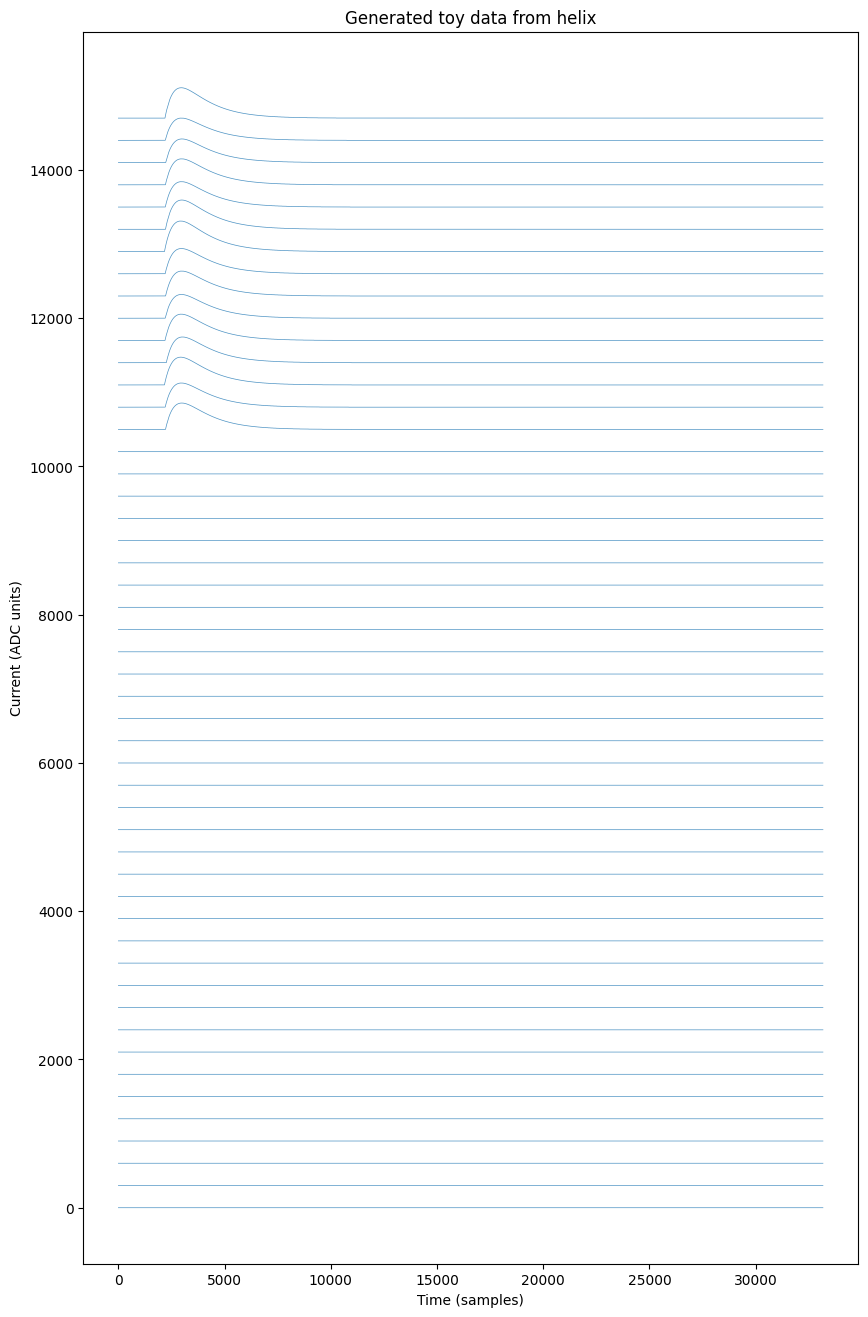

In [7]:
run_id = 'run10' 
raw_data_dir = 'toy_data'  # to save the raw toy data
helix_data_dir = 'test_helix_data'  # to save the run metadata
# creating context, registering storage and plugins
context = sx.Context(storage=[sx.DataDirectory(helix_data_dir, provide_run_metadata=False), ],
                     register=[hx.MMCRecords,
                               hx.QPTriggers, hx.UVTriggers,
                               hx.Events, hx.NoiseEvents,
                               hx.NoisePSDs, hx.FitResults])    # all the plugins required for getting fit_results

# creating a dictionary of plugins' options that we want to modify. 
config = {'run_metadata_directory': helix_data_dir,      # for the hx.ToyDataRawRecords plugin
          'noise_events_random_seed': 1}                 # for the hx.NoiseEvents plugin

# passing the settings to the plugins. Strax finds which plugins take these options automatically
context.set_config(config)
events = context.get_array(run_id, 'events')
# Load the raw data directly from the events or traces
raw_data = events['channel_data']

# Choose the event to plot
event_index = 2  # Change this index to select a different event

# Generate artificial baselines to separate channels visually
artificial_baselines = np.arange(len(raw_data[event_index])) * 300

# Plot the raw data
plt.figure(figsize=(10, 16))
plt.plot(raw_data[event_index].T + artificial_baselines, lw=0.5, alpha=0.8, color='C0')
plt.xlabel('Time (samples)')
plt.ylabel('Current (ADC units)')
plt.title(f'Generated toy data from helix')
#plt.savefig('raw_data_traces_plot.png', dpi=300, bbox_inches='tight')

plt.show()
